過去的模型多是針對特定任務,對於data稍微改變分佈是相當敏感的,因此我們要利用大量的data去訓練一個更通用的model,主要的優點是不用在重新建立各個針對特定任務的model開發更為容易,也能夠節省計算資源  
transformer主要有三種modes: 
1. encoder-only(e.g. Bert)
2. decoder-only(e.g. GPT)
3. encoder-decoder(e.g. T5)
---
## Encoder-only
input token is converted into the same number of repr.
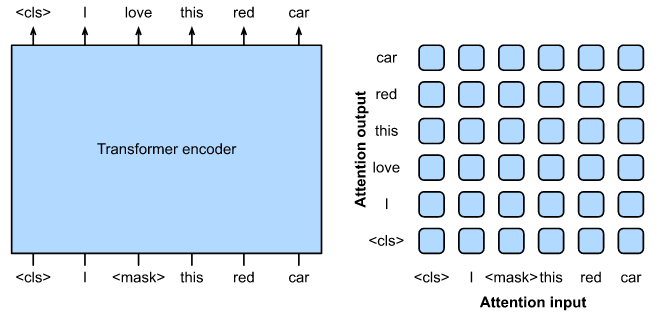
#### fine-tuning BERT
additional layer can be add to Bert with randomized parameters:these parameters will be updated to fit training data of downstream tasks.
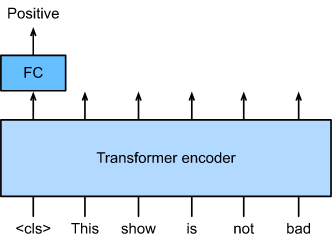

----
## Encoder-Decoder
transformer encoder convert a seq **into same number of output repr
(產生的問題是無法產生隨意長度的seq)**   
past ML task 透過 decoder that autoregressive predict the target seq of arbitary length.  

#### pretraining T5 (text-to-test transfer transformer): 
把問題視為text-to-text的任務(e.g.對input seq做總結),用C5 dataset做預訓練  
`pretraining:`  
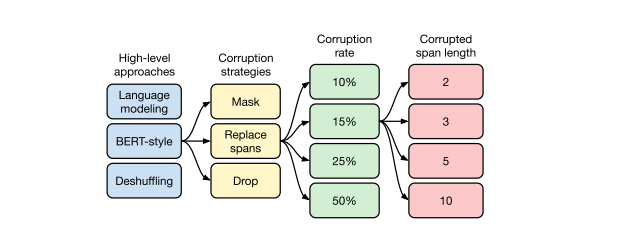
language modeling: 預測下一個字  
BERT-style: 填空/next sentance  
deshuffling: 打亂+還原  
mask: mask token
replace spans: masked token隔壁的特殊符號  
drop: 隨機丟棄token(Bert 15%)

input: I love this red car. (mask love, red car)-> I < x > this < y >  
target seq: < x > love < y > red car < z >  
data運算過程與transformer一樣, encoder做self-attention, decoder做masked attention, cross attention.
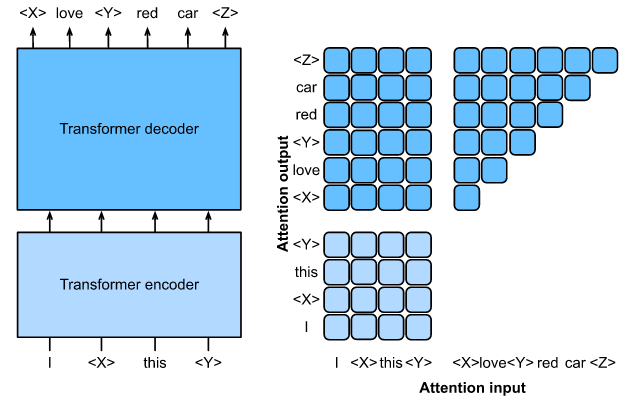
#### Fine-Tuning T5  
1. T5 input include task description
2. T5 can generate seq with arbitary length with its Transformer decoder
3. No additional layer are required  
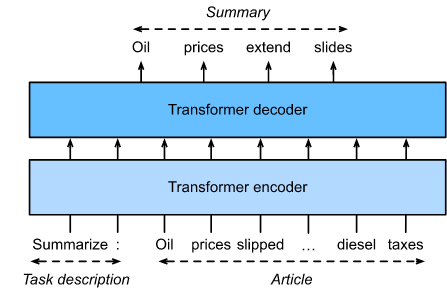  
Text-to-image examples by the Imagen model, whose text encoder is from T5 (figures taken from Saharia et al. (2022)).
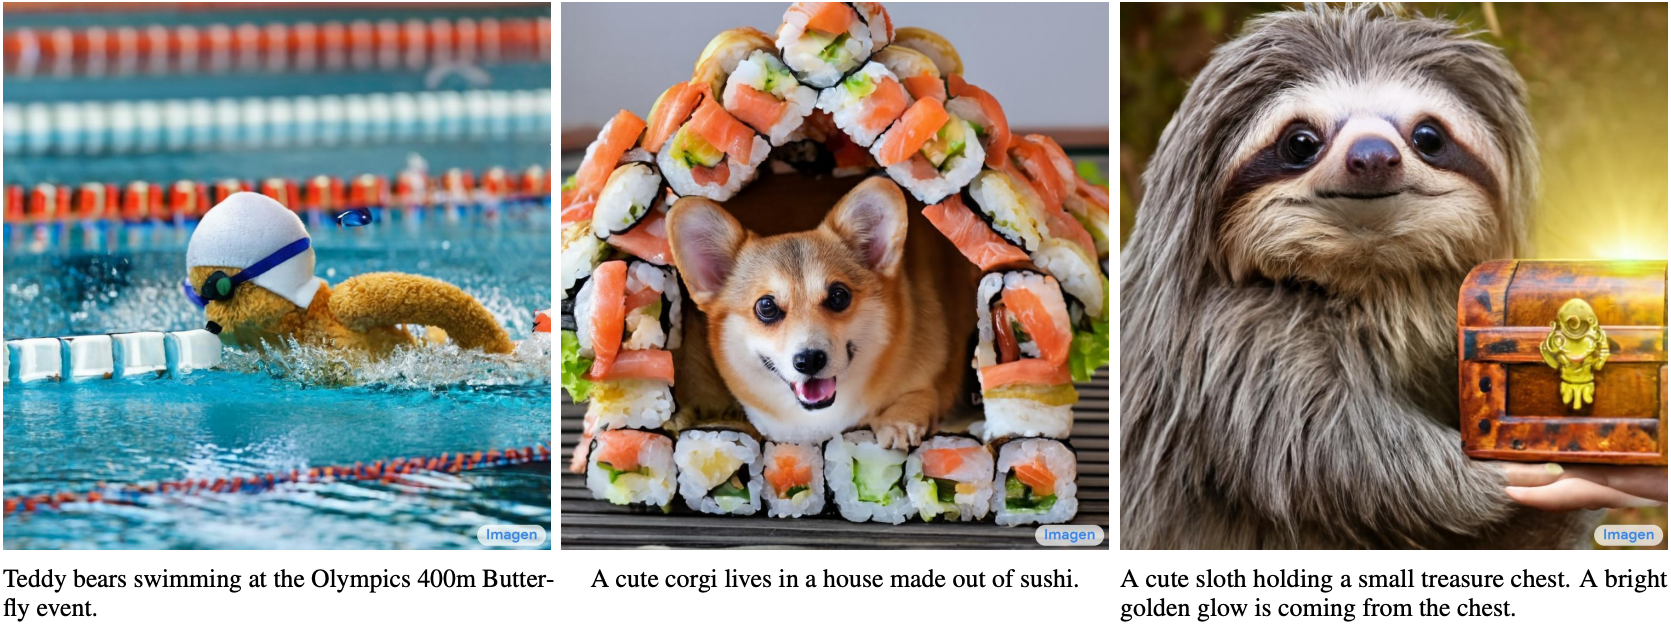
---
## Decoder-only
decoder-only transformer remove the entire encoder and the decoder sublayer with the encoder-decoder cross-attention from the original encoder-decoder archecture.  
input seq by shifted by < bos >, < eos >, 表示開始以及結束的特殊符號, pre-train的方法就是不停的預測下ㄧ個字
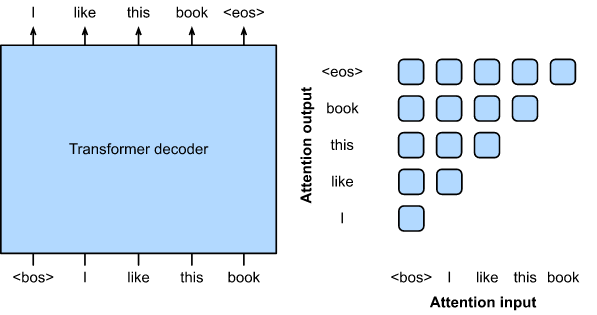
下圖為GPT做zero-shot, one-shot, few-shot的架構圖
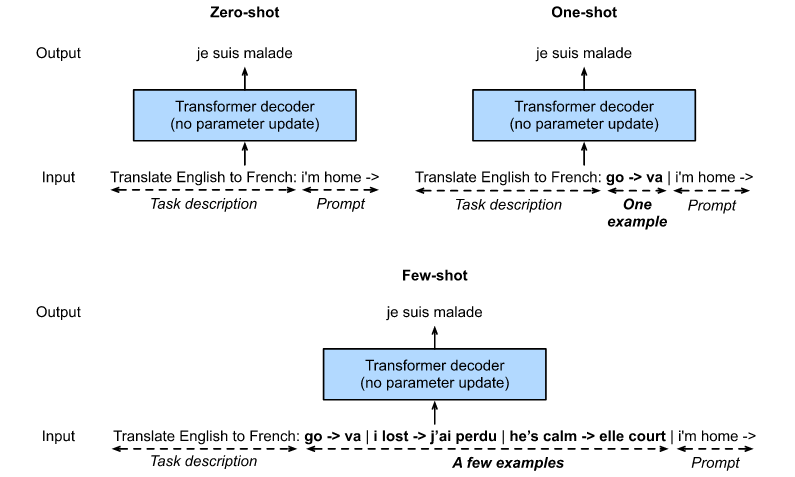
GPT作為一個通用性很強的model不用透過特別的fine-tune model也能夠適應不同的tasks,得到不錯的結果
---
## Scalability  
會隨著compute, dataset size, parameters上升, 提升model的performance, 使model更具備自然語言理解能力
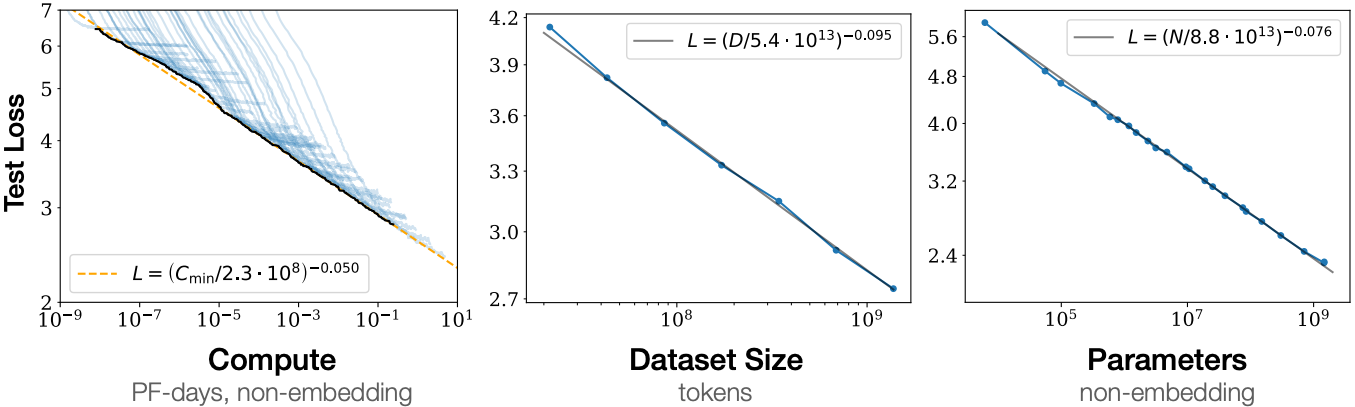
